<a href="https://colab.research.google.com/github/KimestuKun/Final-Project/blob/main/Copy_of_PERSONAL_CAP4630_GermanSigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Group members: Eric Leocadio, Ahmed Tuama, Dominic Meador, Fahima Aziz, Pedro Suarez
# Install kagglehub
!pip install kagglehub

import kagglehub
import os

# Download the latest version of the dataset
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

# List some files to see what’s inside
print("Sample files:", os.listdir(path)[:10])


Using Colab cache for faster access to the 'gtsrb-german-traffic-sign' dataset.
Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign
Sample files: ['Meta', 'meta', 'Meta.csv', 'Train.csv', 'Test.csv', 'Test', 'test', 'Train', 'train']


## This loads the data into the colab before Preprocessing

In [ ]:
import os

data_dir = path # Use the path from kagglehub.dataset_download

# No need to create directory or unzip, as it's already handled by kagglehub
print(f"Data directory is set to: {data_dir}")
print("No unzipping needed as kagglehub downloads and extracts directly.")

Data directory is set to: /kaggle/input/gtsrb-german-traffic-sign
No unzipping needed as kagglehub downloads and extracts directly.


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os

data_dir = path # Should be '/kaggle/input/gtsrb-german-traffic-sign'

# Corrected path construction using the now explicitly set data_dir
train_path = os.path.join(data_dir, 'Train')
csv_path = os.path.join(data_dir, 'Train.csv')

NUM_CLASSES = 43
#Set target size for uniform images
IMG_WIDTH = 30
IMG_HEIGHT = 30
X = []
Y = []
#Add images to sets
for i in range(NUM_CLASSES):
    # Use a different variable name for the class folder path to avoid shadowing the global 'path'
    class_folder_path = os.path.join(train_path, str(i))
    images = os.listdir(class_folder_path)
    for img in images:
        #open the img file
        image = Image.open(os.path.join(class_folder_path, img))
        #resize the files
        image = image.resize((IMG_WIDTH, IMG_HEIGHT))
        #Change
        image = np.array(image)
        #add image and label (folder name) to the sets
        X.append(image)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

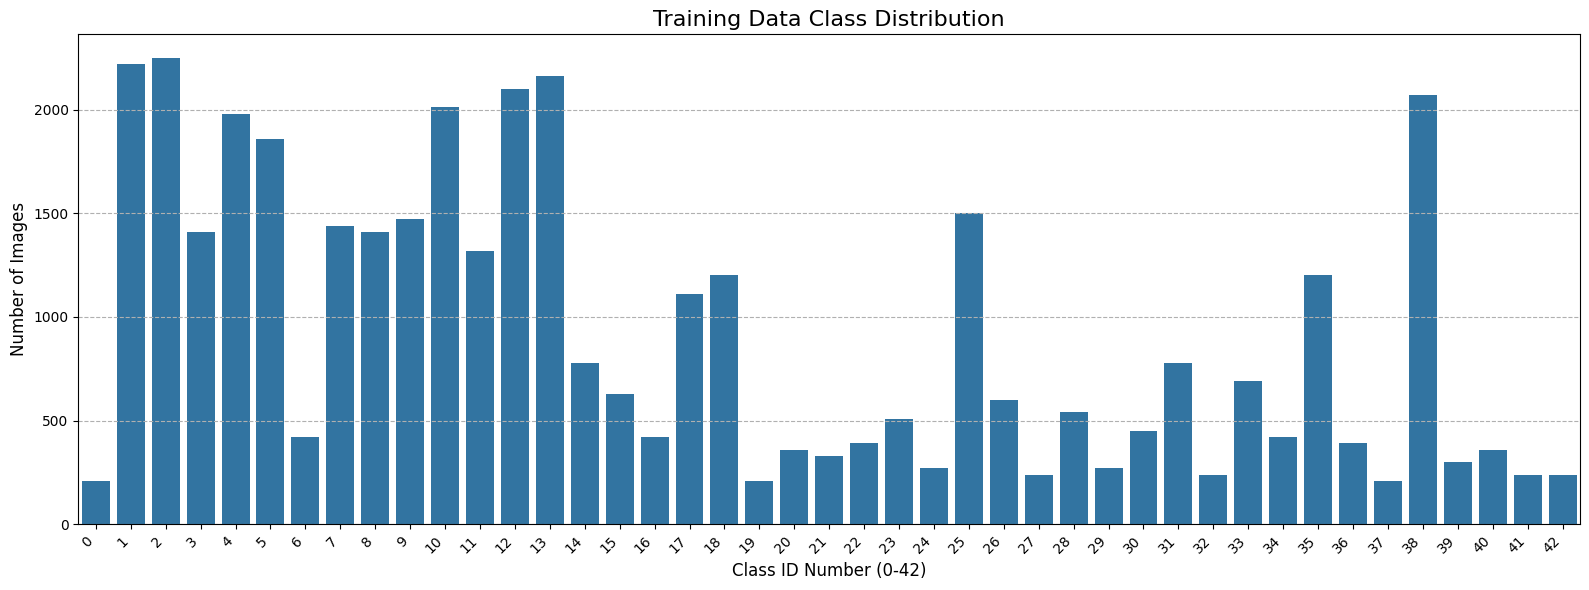

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
Y = pd.Series(Y)
class_counts = Y.value_counts().sort_index()
plt.figure(figsize=(16, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)

#Graph of Class Distribution
plt.title('Training Data Class Distribution', fontsize=16)
plt.xlabel('Class ID Number (0-42)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Check that everything loaded in properly

In [ ]:
print("\n file loading done, verify:")
print(f"Total images: {len(X)}") #39209
print(f"Shape of X (Images): {X.shape}") # (39209, 30, 30, 3)
print(f"Shape of Y (Labels): {Y.shape}") #(39209,)


 file loading done, verify:
Total images: 39209
Shape of X (Images): (39209, 30, 30, 3)
Shape of Y (Labels): (39209,)


## Now process and normalizing

In [ ]:
#Normalize pixel values from 0-255 to 0-1.0 to make data more easy to work with and read
X = X.astype('float32') / 255.0
print(f"Normalized X shape: {X.shape}")
print(f"Integer Y shape:  {Y.shape}")

Normalized X shape: (39209, 30, 30, 3)
Integer Y shape:  (39209,)


## Data Splitting

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"Y_val shape:   {Y_val.shape}")
print("-" * 25)
print("Data is ready for model building!")

X_train shape: (31367, 30, 30, 3)
Y_train shape: (31367,)
X_val shape:   (7842, 30, 30, 3)
Y_val shape:   (7842,)
-------------------------
Data is ready for model building!


## Start making the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = len(np.unique(Y_train))

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(30,30,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,019 (1.29 MB)

 Trainable params: 339,019 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

## Now to train the model

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=15,
    batch_size=64
)


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.3271 - loss: 2.5027 - val_accuracy: 0.9527 - val_loss: 0.2483
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8949 - loss: 0.3401 - val_accuracy: 0.9834 - val_loss: 0.0693
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9492 - loss: 0.1596 - val_accuracy: 0.9885 - val_loss: 0.0444
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9655 - loss: 0.1158 - val_accuracy: 0.9922 - val_loss: 0.0311
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9709 - loss: 0.0902 - val_accuracy: 0.9926 - val_loss: 0.0284
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9791 - loss: 0.0694 - val_accuracy: 0.9952 - val_loss: 0.0230
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9820 - loss: 0.0575 - val_accuracy: 0.9938 - val_loss: 0.0251
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9850 - loss: 0.0486 - val_accuracy: 

Testing model

In [ ]:
test_csv_path = os.path.join(data_dir, 'Test.csv')
test_img_dir = os.path.join(data_dir, 'Test')

# Read the CSV
df_test = pd.read_csv(test_csv_path)
X_test = []
Y_test = df_test['ClassId'].values
paths = df_test['Path'].values

for path in paths:
    full_path = os.path.join(data_dir, path)
    image = Image.open(full_path)
    image = image.resize((30, 30))
    X_test.append(np.array(image))

X_test = np.array(X_test).astype('float32') / 255.0
Y_test = np.array(Y_test)
Y_test = pd.Series(Y_test)

print(f"Test Data Loaded: {X_test.shape}")

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

Test Data Loaded: (12630, 30, 30, 3)
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9772 - loss: 0.1156
Final Test Accuracy: 97.62%


Confusion Matrix

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


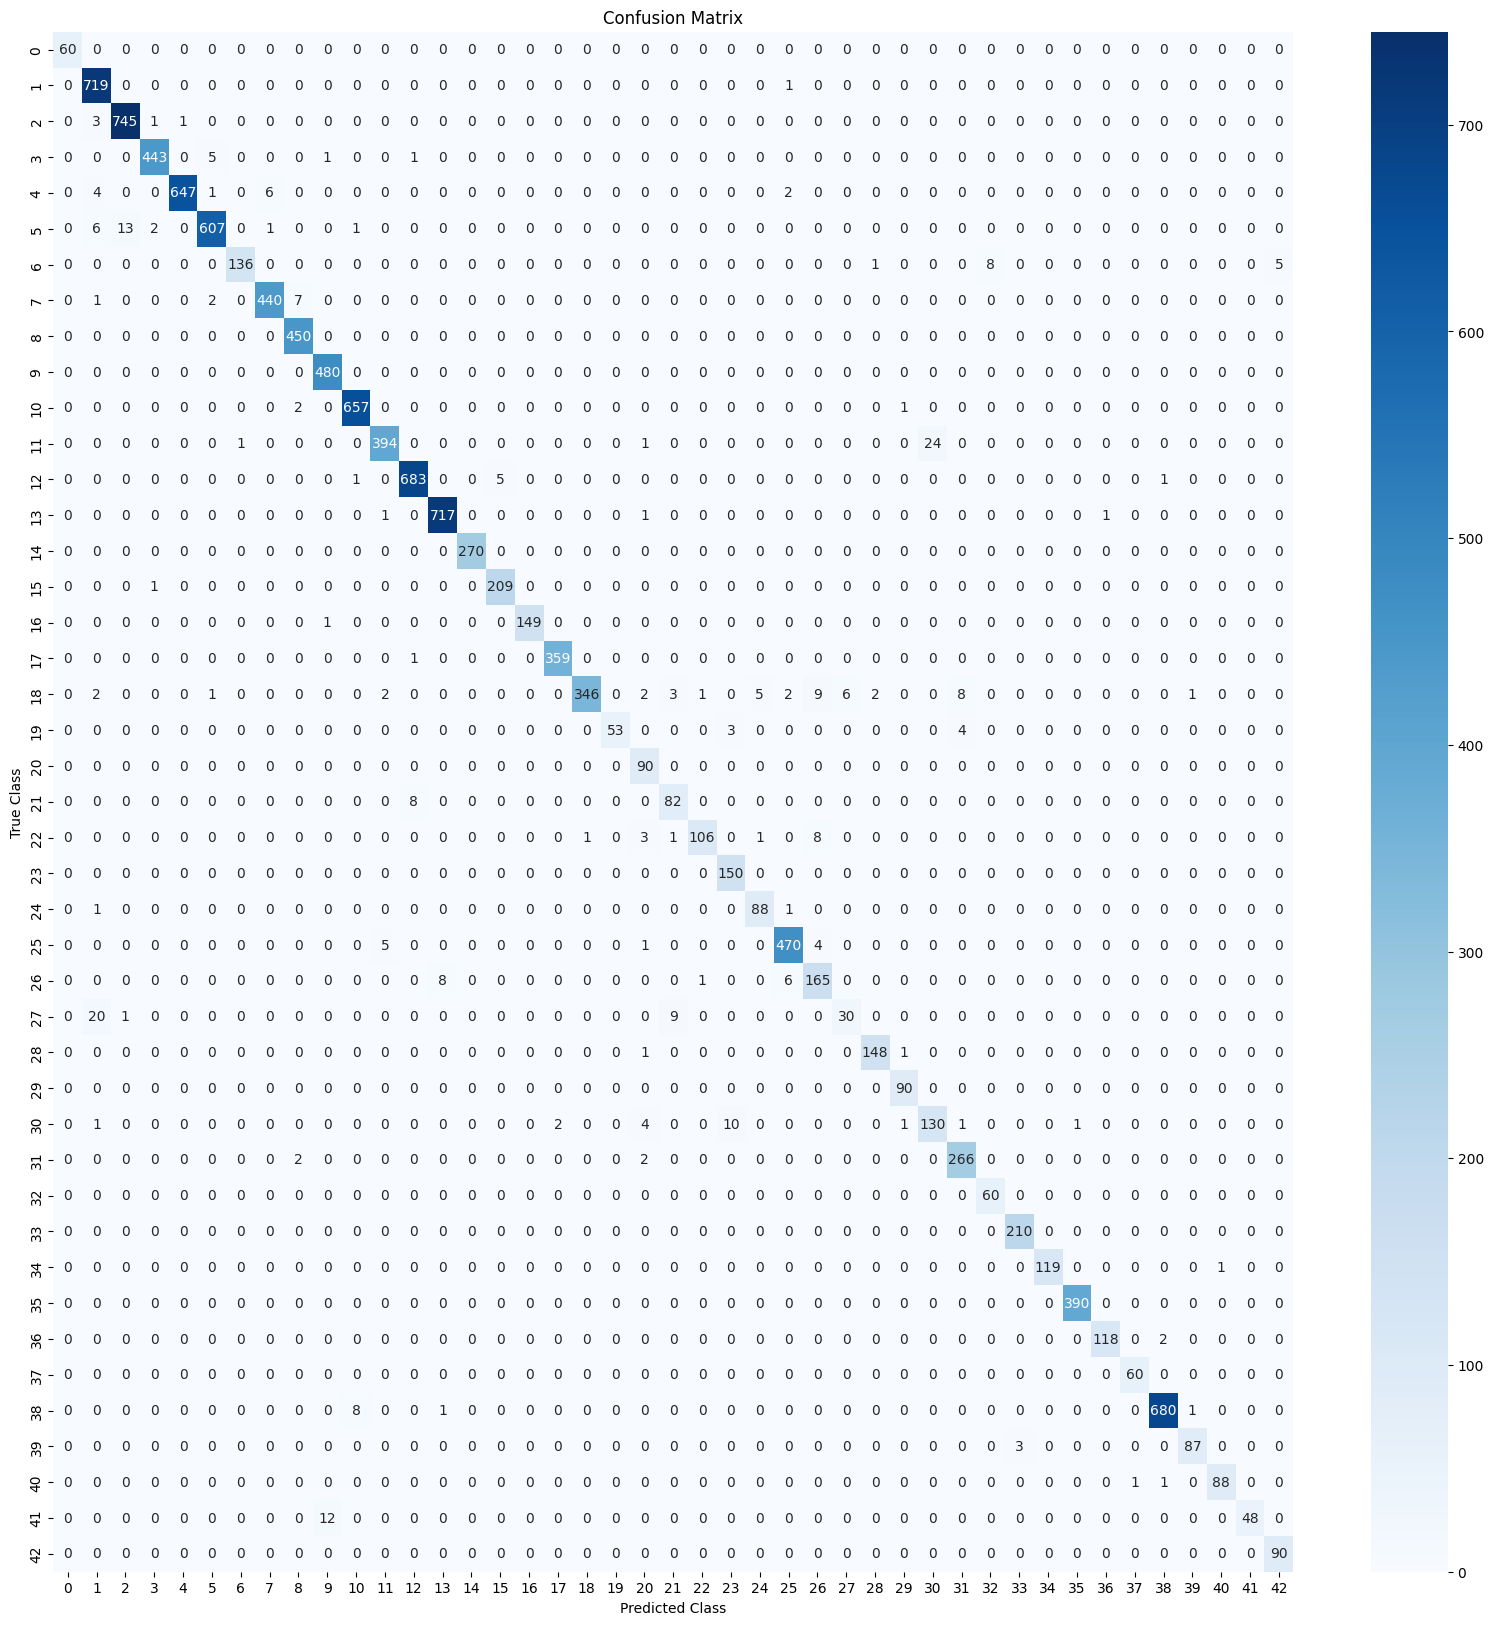

In [ ]:
from sklearn.metrics import confusion_matrix


pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)
matrix = confusion_matrix(Y_test, pred_classes)

#Making graph
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

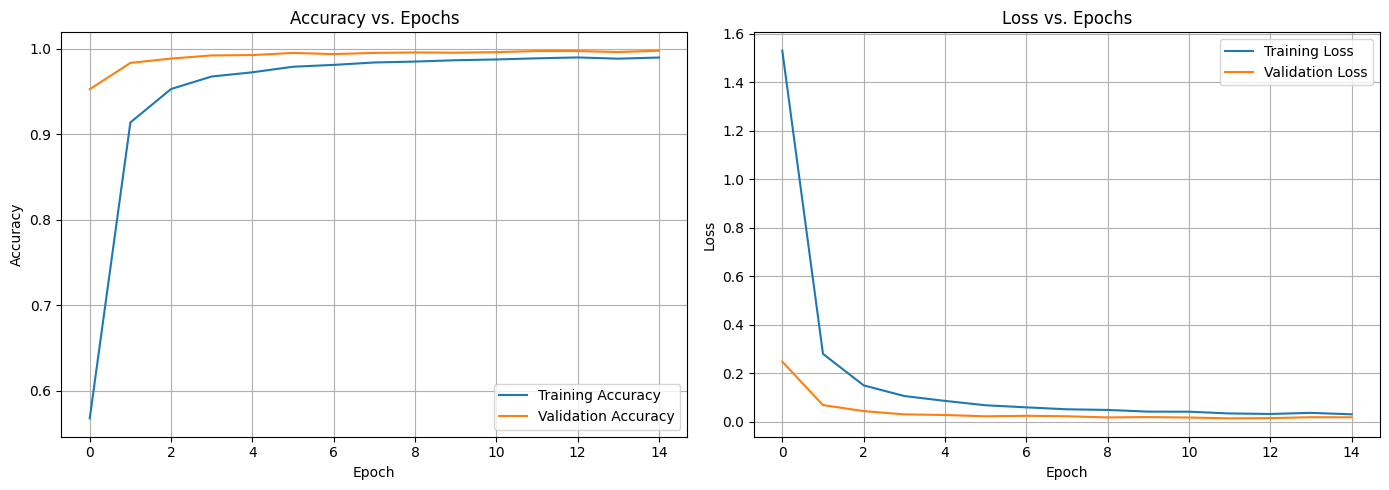

In [ ]:
plt.figure(figsize=(14, 5))

#Graph Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

#Graph Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

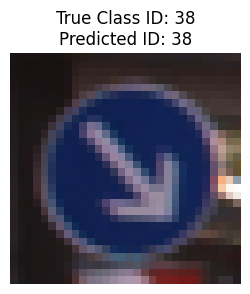

✅ Prediction: CORRECT! (Class 38)


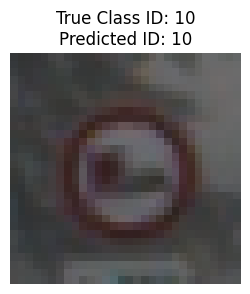

✅ Prediction: CORRECT! (Class 10)


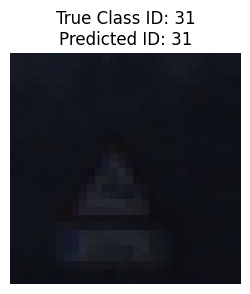

✅ Prediction: CORRECT! (Class 31)


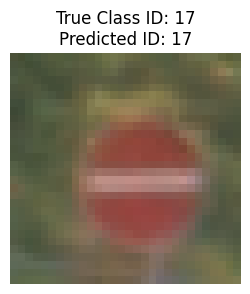

✅ Prediction: CORRECT! (Class 17)


In [ ]:
import random
#demonstration
def predict_single_image(model, X_test, Y_test, index):

    #Get class ID
    true_class_id = Y_test.iloc[index]

    #Get image
    single_image = X_test[index]

    #The model expects a batch of images, so set axis to
    single_image_batch = np.expand_dims(single_image, axis=0)

    #Get predictions
    prediction = model.predict(single_image_batch, verbose=0)

    #Get the index the prediction
    predicted_class_id = np.argmax(prediction)

    #Show image
    plt.figure(figsize=(3, 3))
    plt.imshow(single_image)
    plt.title(f"True ID: {true_class_id}\nPredicted ID: {predicted_class_id}")
    plt.axis('off')
    plt.show()

    #Check if guess was correct
    if predicted_class_id == true_class_id:
        print(f"Prediction: CORRECT! (Class {predicted_class_id})")
    else:
        print(f"Prediction: INCORRECT! (Model guessed {predicted_class_id})")

# Test a known correct image (e.g., index 5)
predict_single_test_image(model, X_test, Y_test, index=5)
# Test a random image
predict_single_image(model, X_test, Y_test, index=random.randint(0, len(X_test) - 1))
predict_single_image(model, X_test, Y_test, index=random.randint(0, len(X_test) - 1))
predict_single_image(model, X_test, Y_test, index=random.randint(0, len(X_test) - 1))